## Lunch & Learn
### Understand the Anaconda Landscape and Connect to Database

Data Science is a powerful and interesting field, but sometimes it is confusing as to how we may get started solving problems. With this Lunch & Learn I hope to help those who are interested attain some practical insight as to how to do so.

* __Anaconda Suite:__ is a powerful tool that makes downloading Python, R, and various interface configuration a breeze. 
    * __Step 1:__ 
        * Go to <https://www.anaconda.com/distribution/> and download your version of the full anaconda suite. You wil want to select Mac or Windows based on what you have, then select the Python 3.7 version. 
    * __Step 2:__
        * Once the Anaconda Suite is downloaded, you can access the following tools via the user interface or command line. FYI, I believe all come downloaded with anaconda except for RStudio
            * Jupyter Labs and Notebooks -- are environments for interactive computing in python and has fantastic flexibility for development
            * Spyder -- is a python development environment for scientific and script computing
            * RStudio -- is a scientific development environment for the R language, including Shiny and RMarkdown for reporting
    * __Step 3:__
        * I would suggest playing around in python with Jupyter Labs first. Some packages of interest that come pre-installed with the anaconda distribution are: 
            * _pandas_ for data manipulation in dataframes
            * _numpy_ for mathematical computing
            * _matplotlib_ for data visualization. 

        * FYI 
            * Installing new packages require getting on the __guest network__ before downloading
            * Connecting to local databases require being connected to the __data network__
            
__Below__, we are going to discuss a few things we can do here that can help you learn more about getting started in the Anaconda Suite and Python for Data Science. 

1. Read data from CSV and pandas basics
2. Reading Data from a Relational Database
3. Visualize Data in matplotlib
4. Data Science Learning Philosophy

### View pandas basics

pandas is a the data scientist's best friend in regards to data manipulation. You primarily operate out of the dataframe, a tabular data structure that is conceptually very similar to much of your work in SQL. 

Below, we can walk through a few of the basic commands in python's pandas package to get you familiar with playing with this data structure. 

In [21]:
# Import Packages

import pandas as pd

In [19]:
# Read CSV, save as df

df = pd.read_csv('FACILITY_LOCATION_MASTER.csv')


In [20]:
# Head

df.head()

,POS_ID,IS_CENTURA,POS_NAME,POS_TYPE,ADDRESS_LINE_1,CITY,STATE_NAME,ZIP,ADDRESS_FULL,latitude,longitude
0,73,0,UNIVERSITY OF CO HOSPITAL - DIALYSIS,End-Stage Renal Disease Treatment Facility,12605 E. 16TH AVE,AURORA,COLORADO,80045,"12605 E. 16TH AVE AURORA, COLORADO 80045",39.742629,-104.842029
1,74,0,CANON CITY DIALYSIS (FMC),End-Stage Renal Disease Treatment Facility,2245 FREMONT DR,CANON CITY,COLORADO,81212,"2245 FREMONT DR CANON CITY, COLORADO 81212",38.448605,-105.215321
2,75,0,MONTROSE DIALYSIS (DCI),End-Stage Renal Disease Treatment Facility,846 SOUTH 5TH STREET,MONTROSE,COLORADO,81401,"846 SOUTH 5TH STREET MONTROSE, COLORADO 81401",38.478853,-107.867149
3,76,0,MILE HIGH PD (DVA),End-Stage Renal Disease Treatment Facility,1750 PIERCE ST STE A,LAKEWOOD,COLORADO,80214,"1750 PIERCE ST STE A LAKEWOOD, COLORADO 80214",39.745227,-105.071313
4,77,0,BELCARO DIALYSIS (DVA),End-Stage Renal Disease Treatment Facility,755 S COLORADO BLVD,DENVER,COLORADO,80246,"755 S COLORADO BLVD DENVER, COLORADO 80246",39.702746,-104.941592


In [21]:
# Manipulate (select only last 3 columns)

df = df[['POS_TYPE','ADDRESS_FULL']]
df.head()

,POS_TYPE,ADDRESS_FULL
0,End-Stage Renal Disease Treatment Facility,"12605 E. 16TH AVE AURORA, COLORADO 80045"
1,End-Stage Renal Disease Treatment Facility,"2245 FREMONT DR CANON CITY, COLORADO 81212"
2,End-Stage Renal Disease Treatment Facility,"846 SOUTH 5TH STREET MONTROSE, COLORADO 81401"
3,End-Stage Renal Disease Treatment Facility,"1750 PIERCE ST STE A LAKEWOOD, COLORADO 80214"
4,End-Stage Renal Disease Treatment Facility,"755 S COLORADO BLVD DENVER, COLORADO 80246"


In [28]:
# Group

df_g = df.groupby(['POS_TYPE']).count().sort_values(by = 'ADDRESS_FULL', ascending = False).reset_index(drop = False)
df_g.head()

,POS_TYPE,ADDRESS_FULL
0,Home Health Services,454
1,Inpatient Hospital,349
2,Skilled Nursing Facility,325
3,Assisted Living Facility,252
4,Hospice,209


In [30]:
# Import Package

import numpy as np


In [34]:
# Create a Copy

df_g2 = df_g.copy()

# Create New Column, random integer between 0 and 1000 of new dataframe

df_g2['random'] = np.random.randint(0,1000,size=(len(df_g2), 1))
                                    
# View Result
                                    
df_g2.head()

,POS_TYPE,ADDRESS_FULL,random
0,Home Health Services,454,693
1,Inpatient Hospital,349,860
2,Skilled Nursing Facility,325,602
3,Assisted Living Facility,252,232
4,Hospice,209,287


In [43]:
# Join df_g to df_g2

df_j = df_g.merge(df_g2[['POS_TYPE','random']], left_on = 'POS_TYPE', right_on = 'POS_TYPE', how = 'left')

# View Result

df_j.head()

,POS_TYPE,ADDRESS_FULL,random
0,Home Health Services,454,693
1,Inpatient Hospital,349,860
2,Skilled Nursing Facility,325,602
3,Assisted Living Facility,252,232
4,Hospice,209,287


### Visualize Data in matplotlib

In [44]:
# Import Packages

import matplotlib.pyplot as plt

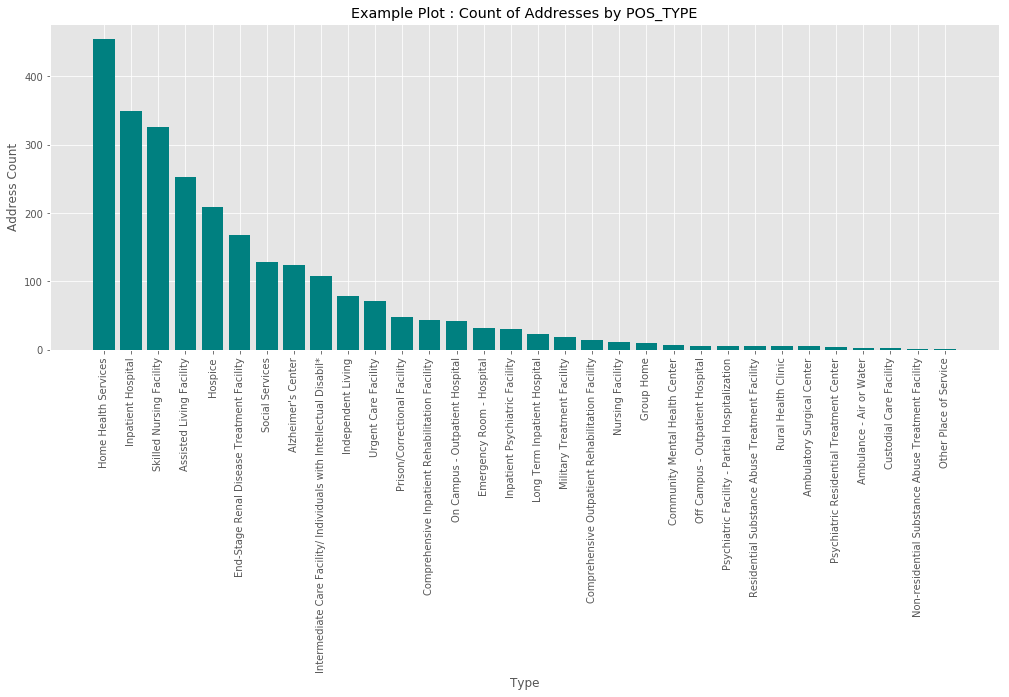

In [57]:
# Visualize Plot

plt.figure(figsize=(17, 6)) # set print size
plt.style.use('ggplot') # set style
plt.bar(df_j.POS_TYPE, df_j.ADDRESS_FULL, align = 'center', color = 'teal') # build plot
plt.xticks(rotation=90) # rotate x-axis labels
plt.ylabel('Address Count') # add y label
plt.xlabel('Type') # add x label
plt.title('Example Plot : Count of Addresses by POS_TYPE') # add title
plt.show() # must add .show() method to display plot

### Reading Data from a Relational Database

The primary duty of anyone in a company is connecting to real-life data and for those companies built on older microsoft infrastructures have some difficulties getting reliable connection to a local MSSQL database. To keep you from having to deal with this pain, I have created a windows authentification class for you to read data from a sql table of choice. 

The code below walks you through install of packages needed, import packages, class creation and the use of the class.

In [ ]:
# Install package on Guest Network

! pip install sqlalchemy


In [4]:
# Import Packages

import sqlalchemy as db
import pandas as pd
import base64


In [5]:
# Create Class
 
class windows_mssql:
    
    def __init__(self, username, password, host, port):
        
        self.engine = db.create_engine('mssql+pymssql://' + username + ':' + password + '@'+ host + ':' + port + '/?charset=utf8')
        self.connection = self.engine.connect()
 
    def from_sql(self, query):
        self.result = pd.read_sql(query, self.connection)
        
    def to_sql(self, data, name, if_exists = 'replace', index = False):
        data.to_sql(name = name, con = self.connection, if_exists = if_exists, index = index)
            
    def close_conn(self):
        self.connection.close()
        

In [17]:
# Initialize Credentials and SQL String


# Variables for MSSQL Connection
username = 'COMPANY\\username'
password = 'password'
host = 'server_name'
port = 'port_number'

# SQL String
sql = """
select top 500 * 
from   TABLE_NAME
"""


In [18]:
# Instantiate Class

_ = windows_mssql(username, password, host, port)


In [19]:
# Read in SQL Query

_.from_sql(sql)

# Save to Object

df = _.result


In [ ]:
# Take a look

df.head()

### Data Science Learning Philosophy

The above exercises are a simple taste of the core tools used in a data science script/workflow. If you have interest in the dipping your toes into the field of data science, self-learning is absolutely necessary. You can recieve nudges, help and externalities from fellow data science oriented co-workers and communities, but __YOU__ have to be the driver of your education. 

Some tools that have worked well for self-learning in my career:
* DataCamp -- videos and hands on training
* DataFramed -- podcast by DataCamp oriented around the cutting edge of data science
* O'Reilly and Packt Publishing of technical books -- find a subject you want to really crush, say NLP in python, and work your way through it
* Stack Overflow -- great for spot checking code syntax or giving things a look when you get stuck

Some helpful resources for getting started:
* Understand Jupyter Labs / Notebooks -- <https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=295208661514&utm_targetid=aud-390929969673:dsa-473406581035&utm_loc_interest_ms=&utm_loc_physical_ms=9051708&gclid=Cj0KCQjw5J_mBRDVARIsAGqGLZDN1bDJGzIJRkMPdxw9PbQragzjSL0VLX8Rl4eJTG5X7-TruHKpUuwaAkUdEALw_wcB>
* Data Scientist in Python -- <https://www.datacamp.com/tracks/data-scientist-with-python>
* Data Scientist in R -- <https://www.datacamp.com/tracks/data-scientist-with-r>
* Machine Learning Tutorials <https://machinelearningmastery.com/>
* Latest Data Science News <https://www.kdnuggets.com/>
* Advanced Data Visualization Ideation <https://flowingdata.com/>